In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# WITH SENTIMENT

In [2]:
df = pd.read_excel("kombinasi-parameter.xlsx")
df

,Unnamed: 0,experiment,mse_train,mse_test
0,0,n_lstm=1_neurons=50_epochs=10,0.012903,0.126987
1,1,n_lstm=1_neurons=50_epochs=20,0.012366,0.142422
2,2,n_lstm=1_neurons=50_epochs=30,0.012298,0.121304
3,3,n_lstm=1_neurons=100_epochs=10,0.012628,0.125098
4,4,n_lstm=1_neurons=100_epochs=20,0.012488,0.149739
5,5,n_lstm=1_neurons=100_epochs=30,0.012333,0.136509
6,6,n_lstm=1_neurons=150_epochs=10,0.012596,0.125790
7,7,n_lstm=1_neurons=150_epochs=20,0.012383,0.147800
8,8,n_lstm=1_neurons=150_epochs=30,0.012756,0.133722
9,9,n_lstm=1_neurons=200_epochs=10,0.012769,0.124343


In [3]:
exp = df["experiment"]

n_lstm = df["experiment"].str.extract(r"n_lstm=(\d+)").astype(int)
neurons = df["experiment"].str.extract(r"neurons=(\d+)").astype(int)
epochs = df["experiment"].str.extract(r"epochs=(\d+)").astype(int)
mse_train = df["mse_train"]
mse_test = df["mse_test"]

In [4]:
train_dict = {
    "n_lstm": n_lstm[0].tolist(),
    "neurons": neurons[0].tolist(),
    "epochs": epochs[0].tolist(),
    "mse_train": mse_train.tolist(),
    "mse_test": mse_test.tolist(),
}

In [5]:
max_mse_train_index = df['mse_train'].idxmin()
max_mse_train_row = df.loc[max_mse_train_index]
print(max_mse_train_row)

Unnamed: 0                                19
experiment    n_lstm=2_neurons=150_epochs=20
mse_train                           0.000289
mse_test                            0.001032
Name: 19, dtype: object


In [6]:
max_mse_test_index = df['mse_test'].idxmin()
max_mse_test_row = df.loc[max_mse_test_index]
print(max_mse_test_row)

Unnamed: 0                                22
experiment    n_lstm=2_neurons=200_epochs=20
mse_train                           0.000306
mse_test                            0.001016
Name: 22, dtype: object


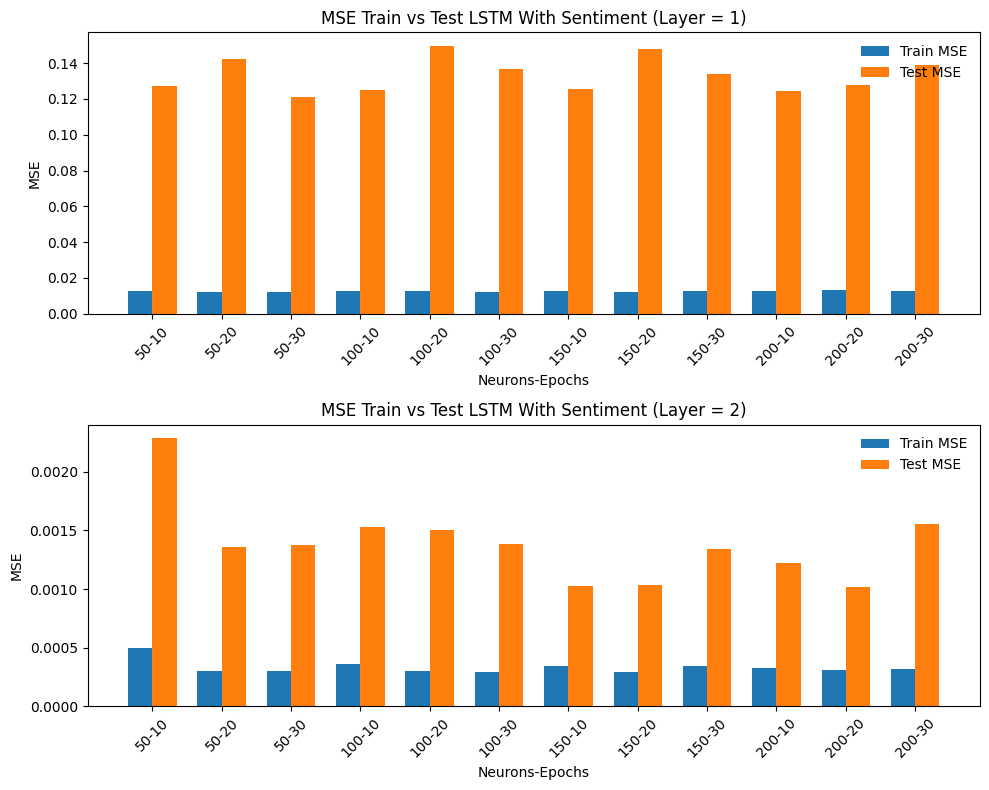

In [7]:
# Filter train_dict for 1 and 2 layers
layer_1_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 1]
layer_2_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 2]

layer_1_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_1_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_1_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_1_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_1_indices]
}

layer_2_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_2_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_2_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_2_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_2_indices]
}

# Plot bar charts
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Layer 1
x = np.arange(len(layer_1_train_dict['neurons']))
width = 0.35
axes[0].bar(x - width/2, layer_1_train_dict['mse_train'], width, label='Train MSE')
axes[0].bar(x + width/2, layer_1_train_dict['mse_test'], width, label='Test MSE')
axes[0].set_title('MSE Train vs Test LSTM With Sentiment (Layer = 1)')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_1_train_dict['neurons'], layer_1_train_dict['epochs'])], rotation=45)
axes[0].set_xlabel('Neurons-Epochs')
axes[0].legend(loc='upper right', frameon=False)  # Legenda di sudut kanan atas dalam kotak, tanpa bingkai

# Layer 2
x = np.arange(len(layer_2_train_dict['neurons']))
axes[1].bar(x - width/2, layer_2_train_dict['mse_train'], width, label='Train MSE')
axes[1].bar(x + width/2, layer_2_train_dict['mse_test'], width, label='Test MSE')
axes[1].set_title('MSE Train vs Test LSTM With Sentiment (Layer = 2)')
axes[1].set_ylabel('MSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_2_train_dict['neurons'], layer_2_train_dict['epochs'])], rotation=45)
axes[1].set_xlabel('Neurons-Epochs')
axes[1].legend(loc='upper right', frameon=False)  # Legenda di sudut kanan atas dalam kotak, tanpa bingkai

plt.tight_layout()
plt.show()


# WITHOUT SENTIMENT

In [8]:
df = pd.read_excel("kombinasi-parameter-2.xlsx")
df

,Unnamed: 0,experiment,mse_train,mse_test
0,0,n_lstm=1_neurons=50_epochs=10,0.012734,0.136415
1,1,n_lstm=1_neurons=50_epochs=20,0.012296,0.148403
2,2,n_lstm=1_neurons=50_epochs=30,0.012547,0.147152
3,3,n_lstm=1_neurons=100_epochs=10,0.012632,0.134061
4,4,n_lstm=1_neurons=100_epochs=20,0.012579,0.151784
5,5,n_lstm=1_neurons=100_epochs=30,0.012295,0.139338
6,6,n_lstm=1_neurons=150_epochs=10,0.012595,0.135080
7,7,n_lstm=1_neurons=150_epochs=20,0.012531,0.149366
8,8,n_lstm=1_neurons=150_epochs=30,0.012304,0.151852
9,9,n_lstm=1_neurons=200_epochs=10,0.012735,0.131180


In [9]:
exp = df["experiment"]

n_lstm = df["experiment"].str.extract(r"n_lstm=(\d+)").astype(int)
neurons = df["experiment"].str.extract(r"neurons=(\d+)").astype(int)
epochs = df["experiment"].str.extract(r"epochs=(\d+)").astype(int)
mse_train = df["mse_train"]
mse_test = df["mse_test"]

In [10]:
train_dict = {
    "n_lstm": n_lstm[0].tolist(),
    "neurons": neurons[0].tolist(),
    "epochs": epochs[0].tolist(),
    "mse_train": mse_train.tolist(),
    "mse_test": mse_test.tolist(),
}

In [11]:
max_mse_train_index = df['mse_train'].idxmin()
max_mse_train_row = df.loc[max_mse_train_index]
print(max_mse_train_row)

Unnamed: 0                                22
experiment    n_lstm=2_neurons=200_epochs=20
mse_train                           0.000297
mse_test                            0.001328
Name: 22, dtype: object


In [12]:
max_mse_test_index = df['mse_test'].idxmin()
max_mse_test_row = df.loc[max_mse_test_index]
print(max_mse_test_row)

Unnamed: 0                                18
experiment    n_lstm=2_neurons=150_epochs=10
mse_train                           0.000342
mse_test                            0.001005
Name: 18, dtype: object


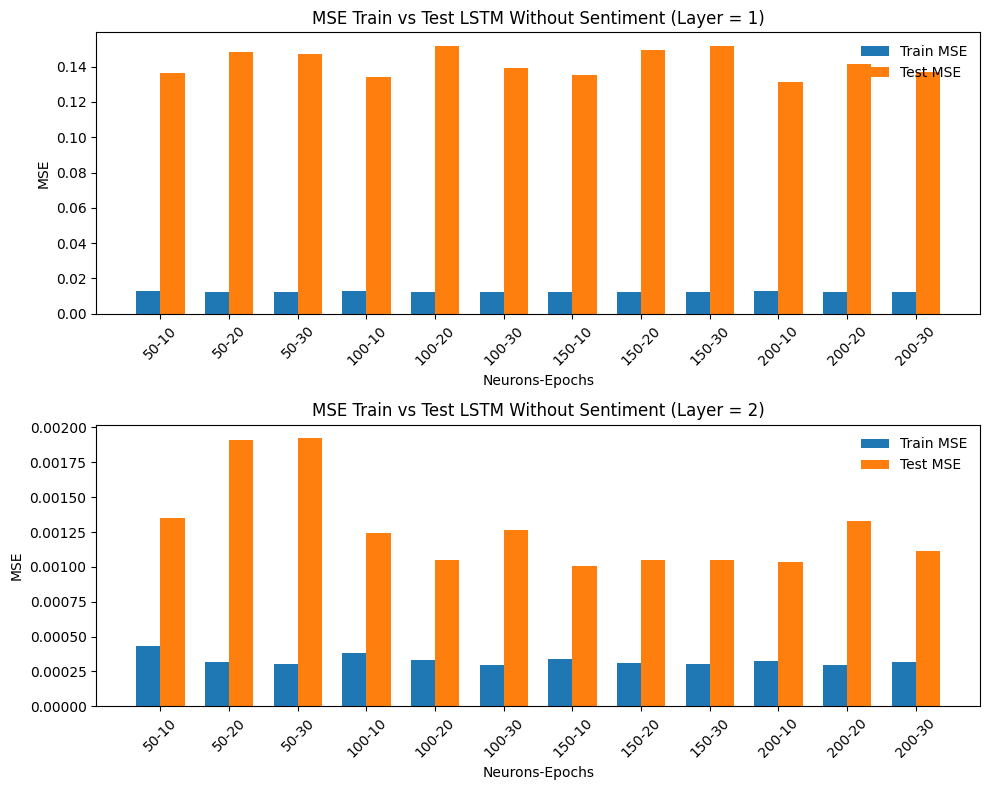

In [13]:
# Filter train_dict for 1 and 2 layers
layer_1_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 1]
layer_2_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 2]

layer_1_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_1_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_1_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_1_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_1_indices]
}

layer_2_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_2_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_2_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_2_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_2_indices]
}

# Plot bar charts
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Layer 1
x = np.arange(len(layer_1_train_dict['neurons']))
width = 0.35
axes[0].bar(x - width/2, layer_1_train_dict['mse_train'], width, label='Train MSE')
axes[0].bar(x + width/2, layer_1_train_dict['mse_test'], width, label='Test MSE')
axes[0].set_title('MSE Train vs Test LSTM Without Sentiment (Layer = 1)')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_1_train_dict['neurons'], layer_1_train_dict['epochs'])], rotation=45)
axes[0].set_xlabel('Neurons-Epochs')
axes[0].legend(loc='upper right', frameon=False)  # Legenda di sudut kanan atas dalam kotak, tanpa bingkai

# Layer 2
x = np.arange(len(layer_2_train_dict['neurons']))
axes[1].bar(x - width/2, layer_2_train_dict['mse_train'], width, label='Train MSE')
axes[1].bar(x + width/2, layer_2_train_dict['mse_test'], width, label='Test MSE')
axes[1].set_title('MSE Train vs Test LSTM Without Sentiment (Layer = 2)')
axes[1].set_ylabel('MSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_2_train_dict['neurons'], layer_2_train_dict['epochs'])], rotation=45)
axes[1].set_xlabel('Neurons-Epochs')
axes[1].legend(loc='upper right', frameon=False)  # Legenda di sudut kanan atas dalam kotak, tanpa bingkai

plt.tight_layout()
plt.show()